In [17]:
import os
import glob
import random
import json
from pycocotools.coco import COCO
import cv2
import matplotlib.pyplot as plt

In [18]:
random.seed('1004')
folder = ['Multiple_Other', 'Single_Default', 'Multiple_Categories', 'Single_Other']
images = []
for f in folder:
  path = f'/opt/ml/finalproject/data/sampled/Astrophysics/**/{f}/**/*.png'
  file_list = glob.glob(path, recursive=True)
  print(f'{f} : {len(file_list)}')
  
  if f.split('_')[1] == 'Other':
    idx = random.sample(file_list, 40)
  else:
    idx = random.sample(file_list, 10)
  images.extend(idx)

Multiple_Other : 1310
Single_Default : 1310
Multiple_Categories : 1310
Single_Other : 1310


In [19]:
json_file = '/opt/ml/finalproject/data/sampled/sampled_train.json'
coco = COCO(json_file)

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


In [20]:
for i in range(5240):
  if coco.imgs[i]['id'] != i:
    print(i)

빈 id가 없다

In [21]:
new_images = [name.split('/')[-1] for name in images]

In [22]:
def draw_bbox(image, anns):
  for ann in anns:
    x, y, w, h = map(int, ann['bbox'])
    image = cv2.rectangle(image, (x, y), (x + w, y + h), (250, 250, 250), -1) # tuple(map(int, colormap[label]))    
  return image

In [23]:
os.mkdir('/opt/ml/finalproject/multilabel/baseline/personal/white_images')

In [24]:
image_dir = '/opt/ml/finalproject/data/sampled'

for i in range(5240):
  image_id = i
  image_infos = coco.loadImgs(image_id)[0]

  # cv2를 활용하여 image 불러오기
  file_name = image_infos["file_name"]
  if file_name in new_images:
  # file_name = origin_path.split('\\')[-1]
    file_path = image_infos["path"]
    path = os.path.join(image_dir, file_path[1:], file_name)
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ann_ids = coco.getAnnIds(imgIds=image_id)
    anns = coco.loadAnns(ann_ids)
    white_image = draw_bbox(image, anns)
    save_path = f'white_images/white_{file_name}'
    cv2.imwrite(save_path, cv2.cvtColor(white_image, cv2.COLOR_BGR2RGB))


In [11]:
white_image_name = os.listdir('/opt/ml/finalproject/multilabel/baseline/personal/white_images')
# white_image_name

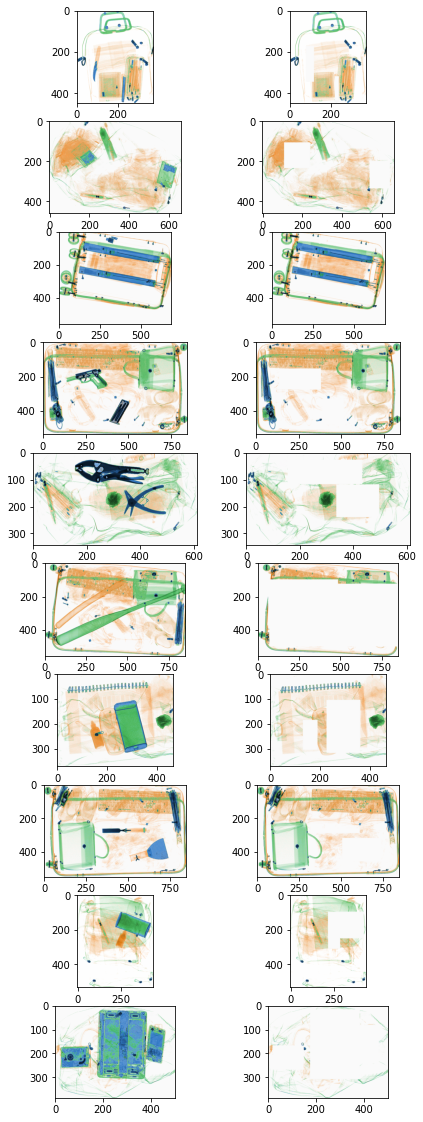

In [25]:
num_examples = 10
n_cols = 2
fig, axes = plt.subplots(
    nrows= num_examples, 
    ncols=n_cols, 
    figsize=(7, int(2*num_examples)), 
    # constrained_layout=True
)

for row_num in range(num_examples):
  img = cv2.imread(images[row_num])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  axes[row_num][0].imshow(img)
  w_path = os.path.join('white_images', 'white_' + images[row_num].split('/')[-1] )
  w_img = cv2.imread(w_path)
  w_img = cv2.cvtColor(w_img, cv2.COLOR_BGR2RGB)
  axes[row_num][1].imshow(w_img)
